<font color=blue>
Supriya Raman<br>
Linear Regression Assignment <br>
2nd December, 2019
    </font>

# <font color=navy> <u> Linear Regression Assignment </font>
## <font color=navy> Geely Auto Case Study </font>

#### <font color=navy> Problem Statement: </font> <br>
<font color=brown>
Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. The company wants to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. </font>

#### <font color=navy> Business Goal: </font> <br>
The below model is developed to help the company: 
- To identify the variables which are significant in predicting the price of a car.
- To create a linear model that quantitatively relates car prices with other 26 attributes whose data is gathered by the consulting firm for different types of cars across the Americal market. 
- To know the accuracy of the model, i.e. how well these variables can predict car prices.

## Table of Contents 
<a href='#Pre-Step'> Pre-Step: Changing path of data file </a> <br>
<a href='#Step 0'> Step 0: Importing Libraries </a> <br>
<a href='#Step 1'> Step 1: Reading and Understanding the Data </a> <br>
<a href='#Step 2'> Step 2: Data Cleaning and Preparation </a> <br>
<a href='#Step 3'> Step 3: Data Visualization </a> <br>
<a href='#Step 4'> Step 4: Preparing Data for Modelling </a> <br>
<a href='#Step 5'> Step 5: Building a linear model </a> <br>
<a href='#Step 6'> Step 6: Residual Analysis of the train data </a> <br>
<a href='#Step 7'> Step 7: Making Predictions Using the Final Model </a> <br>
<a href='#Step 8'> Step 8: Model Evaluation </a> <br>

## Pre-Step : Changing path of data file <a id='Pre-Step'></a>
Before executing the code in this sheet, please changing the path of csv file which stores the CarPrice_Assignment data

## Step 0: Importing Libraries <a id='Step 0'></a>
Importing all required Python Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Python Libraries
import numpy as np
import pandas as pd

# Libraries for Graphs and Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data in Train and Test sets
from sklearn.model_selection import train_test_split

# Rescaling of Numerical features
from sklearn.preprocessing import MinMaxScaler

# Importing for linear model using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate R2-score of test data
from sklearn.metrics import r2_score

## Step 1: Reading and Understanding the Data <a id='Step 1'></a>
Read the data from the file and inspect its various aspects like shape, missing data, numerical attributes etc.

In [3]:
df_car = pd.read_csv("C:\\NotBackedUp\\CarPrice_Assignment.csv")

In [4]:
# Check the head of the dataset
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspecting the various aspects of the car dataframe

In [5]:
df_car.shape
# Dataframe has 205 rows and 26 attributes

(205, 26)

In [6]:
df_car.info()
# Below information shows that all 26 attributes has data in all 205 rows and there is no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
df_car.describe()
# Dataframe has 16 numerical attributes as described below

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Data Cleaning and Preparation <a id='Step 2'></a>

Analysing the data relevance and cleaning the data

In [8]:
# "car_ID" field is not found relevant for Regression model and thus field is dropped
df_car.drop(['car_ID'],axis=1,inplace=True)
df_car.shape

(205, 25)

In [9]:
# Problem Statement specifies Attribute "CarName" comprised of two parts - 
# The first word is the name of 'car company' and the second is the 'car model'. 
# We need to consider only company name as the independent variable for model building.

#Splitting company name from CarName column
CompanyName = df_car['CarName'].apply(lambda x : x.split(' ')[0])
df_car.insert(2,"CompanyName",CompanyName)
df_car.drop(['CarName'],axis=1,inplace=True)
df_car.tail()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [10]:
# Listing all the unique values of CompanyName
df_car['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

<i> Fixing invalid values in CompanyName field </i> <br>
There seems to be some spelling error and case sensitive data in the CompanyName column as below -

- maxda = mazda
- Nissan = nissan
- porsche = porcshce
- toyota = toyouta
- vokswagen = volkswagen =  vw

In [11]:
# Changing all data in CompanyName to lower case
df_car['CompanyName'] = df_car['CompanyName'].str.lower()

# Replace duplicate values with one single value
def replace_name(a,b):
    df_car.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df_car.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
## Drop Duplicate rows if any
df_car.drop_duplicates(keep="first")
df_car.shape
# There is no duplicate row found in the Dataframe

(205, 25)

## Step 3: Data Visualization <a id='Step 3'></a>

We'll visualise our data using `matplotlib` and `seaborn` to get better understanding of the data

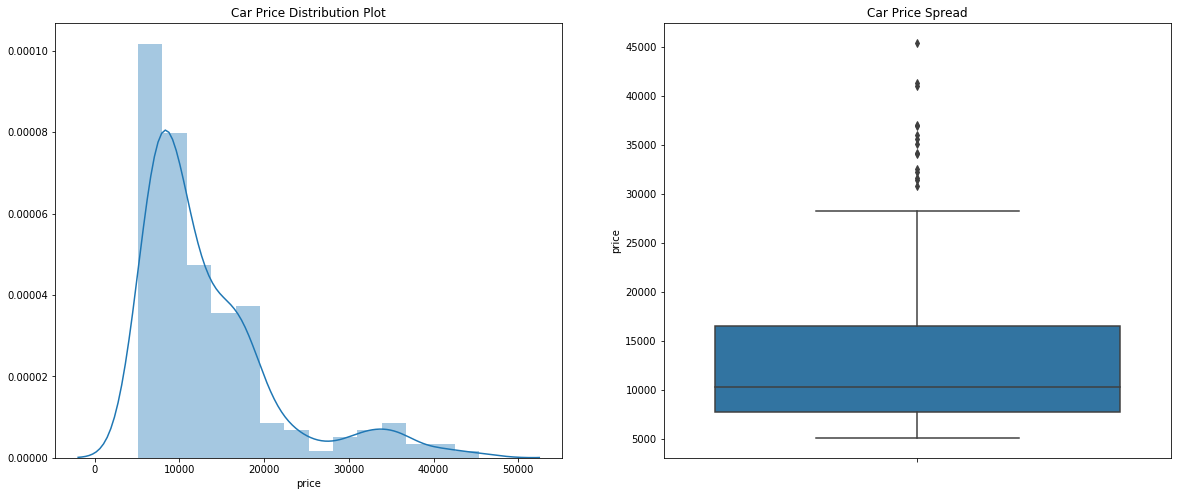

In [13]:
# Analyzing Car Price field
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df_car.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df_car.price)

plt.show()

In [14]:
# Displaying the Car price distribution
print(df_car.price.describe())

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


Inference:
- The distribution plot is right-skewed which shows most prices in the dataset are low(Below 15,000).
- There is a significant difference between the mean and the median of the car price distribution.
- The data points are far spread out from the mean, which indicates a high variance in the car prices.(50% of the prices are below 10,295, whereas the remaining 50% are between 10,295 and 45,400.)

In [15]:
# Find columns where number of unique value is only 1
unique = df_car.nunique()
unique = unique[unique.values == 1]
unique
# There is no column found which has only one unique value

Series([], dtype: int64)

Inference:
1. Out of 26 existing attributes, Car_ID is dropped as its not found relevant for modelling.
2. Excluding "price" which is dependent variable, 24 attributes are left for our analyis.
3. There are 11 Categorical variables and 13 numerical variables in the Dataframe. (Identified from Data Dictionary)

#### <font color=navy> Visualising Categorical Variables </font>

Below are the categorical variables present in the data. Boxplot is plotted for these variables with respect to the price of the car to check their relationship.

- CompanyName
- symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

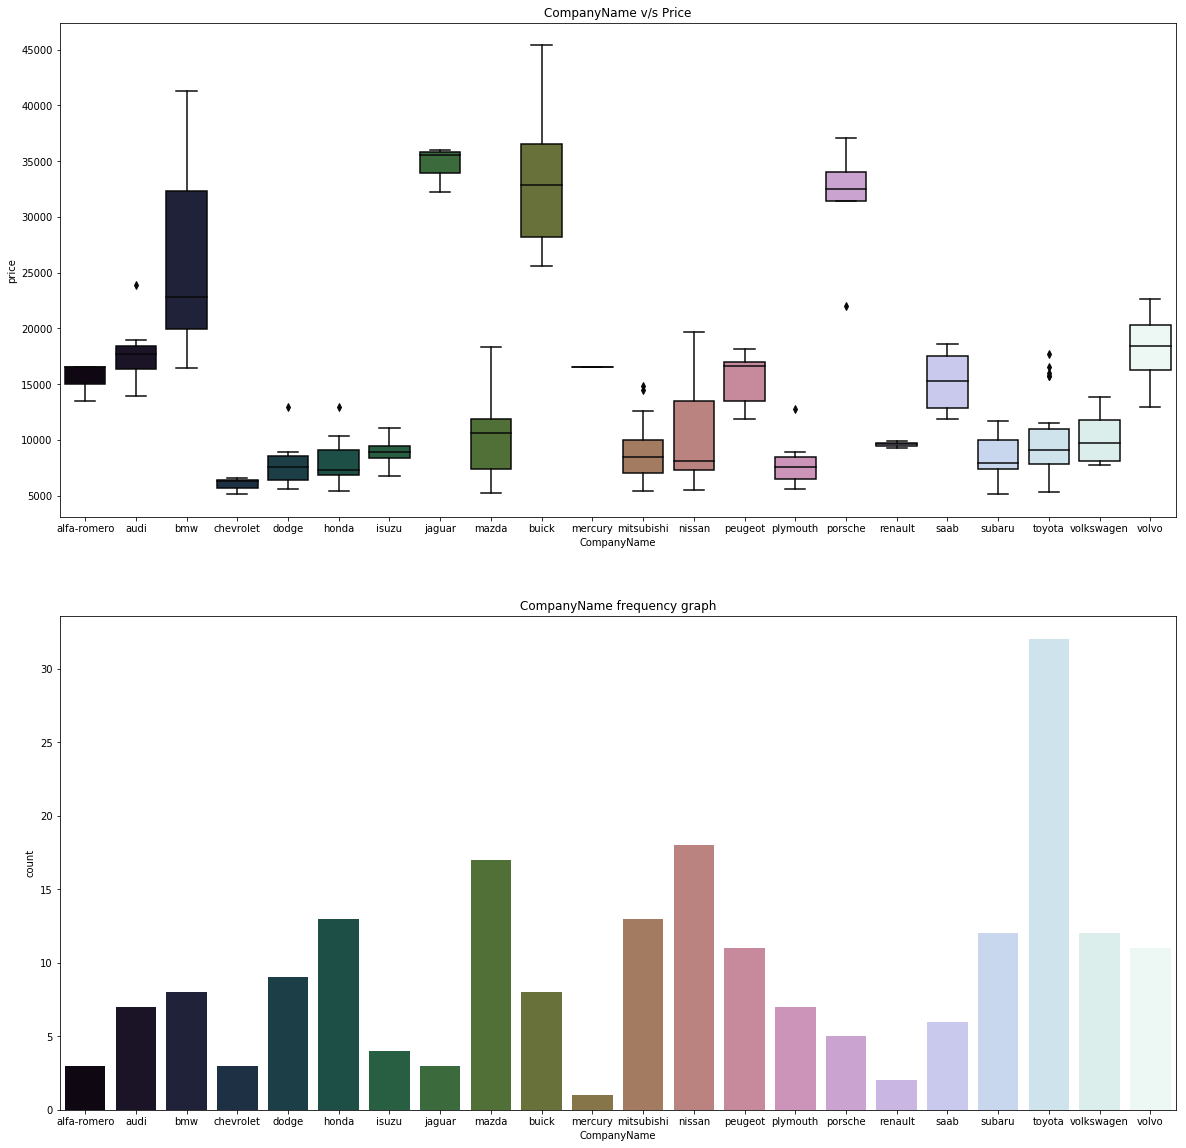

In [16]:
# Analyzing data for CompanyName column
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.title('CompanyName v/s Price')
sns.boxplot(x = 'CompanyName', y = 'price', data = df_car, palette=("cubehelix"))
plt.subplot(2,1,2)
plt.title('CompanyName frequency graph')
sns.countplot(df_car.CompanyName, palette=("cubehelix"))
plt.show()

Inference: 
1. "toyota" Company brand is found to have highest frequency of cars and is most favourite
2. Jaguar and Buick cars seem to have highest average price.

In [17]:
# Since there are lot of Car Company, we can group the field according to the price bracket
# Binning the Car Companies based on avg prices of each Company.
df_car['price'] = df_car['price'].astype('int')
temp = df_car.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Low','Medium','High']
df_car['CarCompanyOnPriceRange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)

df_car.drop(['CompanyName'],axis=1,inplace=True)

df_car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyOnPriceRange
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


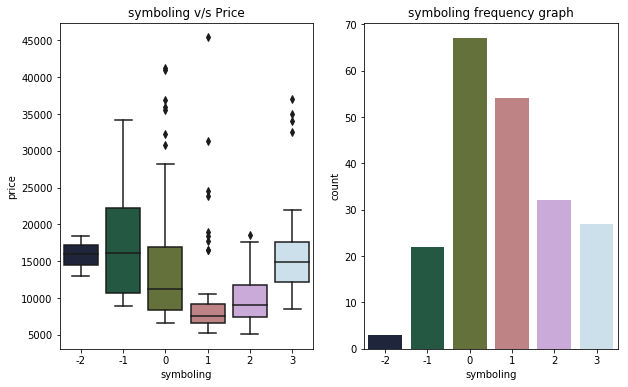

In [18]:
# Analyzing 'symboling' field - Its assigned insurance risk rating
# A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('symboling v/s Price')
sns.boxplot(x = 'symboling', y = 'price', data = df_car, palette=("cubehelix"))
plt.subplot(1,2,2)
plt.title('symboling frequency graph')
sns.countplot(df_car.symboling, palette=("cubehelix"))
plt.show()

Inference: 
1. 'symboling' with values 0 and 1 are the highest frequency.
2. The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1

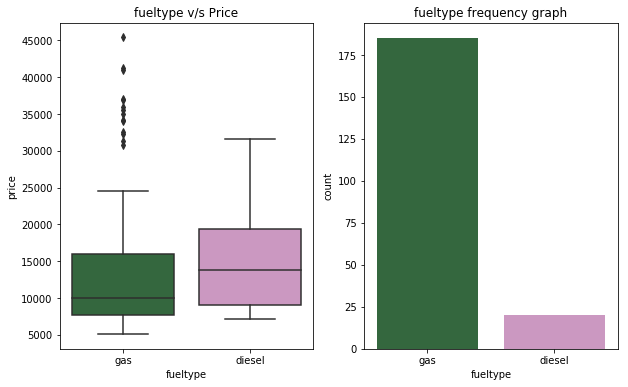

In [19]:
# Analyzing 'fueltype' field - Car fuel type i.e gas or diesel  
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('fueltype v/s Price')
sns.boxplot(x = 'fueltype', y = 'price', data = df_car, palette=("cubehelix"))
plt.subplot(1,2,2)
plt.title('fueltype frequency graph')
sns.countplot(df_car.fueltype, palette=("cubehelix"))
plt.show()

Inference: 
1. gas 'fueltype' has the highest frequency.
2. The cars with diesel fueltype has higher price 

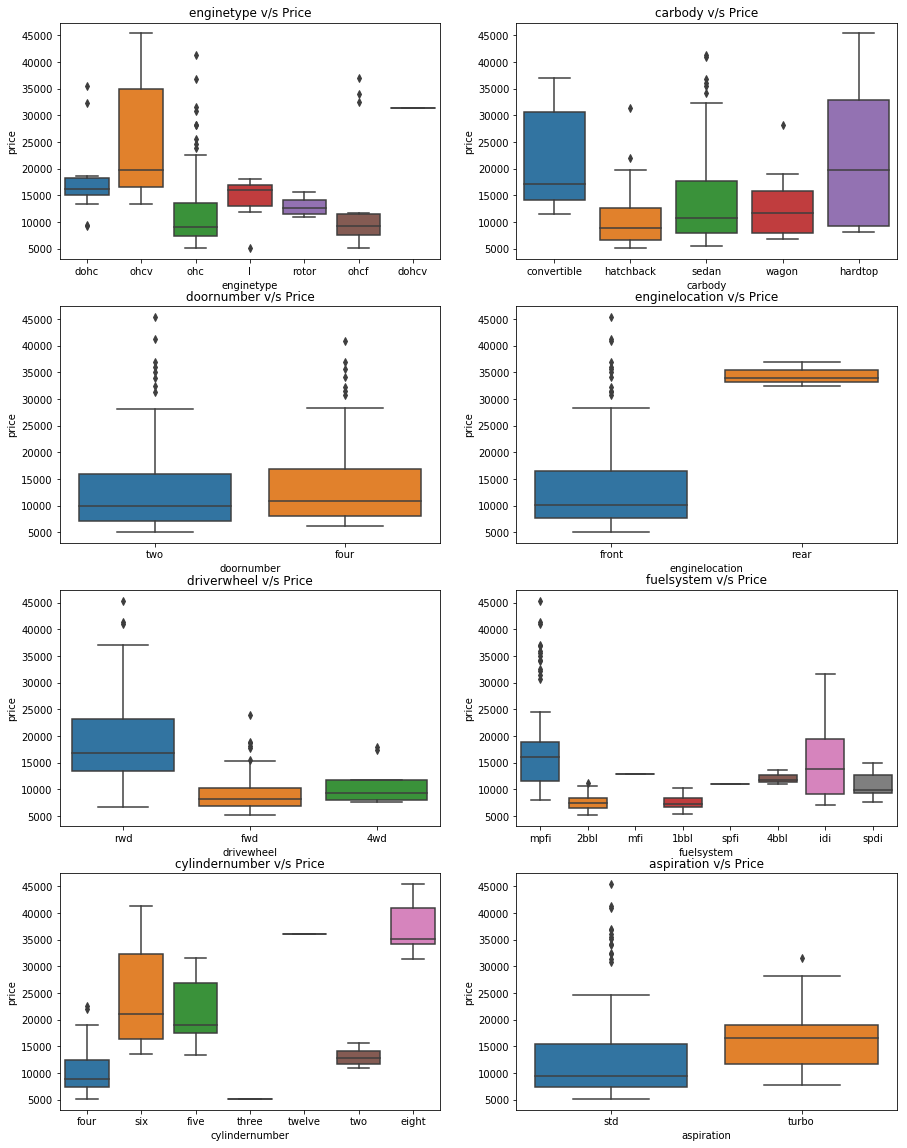

In [20]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
plt.title('enginetype v/s Price')
sns.boxplot(x = 'enginetype', y = 'price', data = df_car)
plt.subplot(4,2,2)
plt.title('carbody v/s Price')
sns.boxplot(x = 'carbody', y = 'price', data = df_car)
plt.subplot(4,2,3)
plt.title('doornumber v/s Price')
sns.boxplot(x = 'doornumber', y = 'price', data = df_car)
plt.subplot(4,2,4)
plt.title('enginelocation v/s Price')
sns.boxplot(x = 'enginelocation', y = 'price', data = df_car)
plt.subplot(4,2,5)
plt.title('driverwheel v/s Price')
sns.boxplot(x = 'drivewheel', y = 'price', data = df_car)
plt.subplot(4,2,6)
plt.title('fuelsystem v/s Price')
sns.boxplot(x = 'fuelsystem', y = 'price', data = df_car)
plt.subplot(4,2,7)
plt.title('cylindernumber v/s Price')
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_car)
plt.subplot(4,2,8)
plt.title('aspiration v/s Price')
sns.boxplot(x = 'aspiration', y = 'price', data = df_car)
plt.show()

Inference:
1. enginetype "ohcv" has the highhest price.
2. carbody "hardtop" and "convertible" is found to be having higher price.
3. doornumber two or four has no major impact on the car price and price is found to have similar distribution for both two or four doors.
4. "rear" enginelocation cars is found to have higher price.
5. "rwd" drivewheel cars is found to have higher price as compared to other cars.
6. "mpfi" and "idi" fuelsystem cars are found to have higher price as compared to other cars.
7. aspiration used in car - "std" or "turbo" has no major impact on car price, though turbo aspiration is found to have little higher price.
8. car with eight cylindernumber is found to have highest car price. There is a dip for car price with three cylindernumber. Other most common number of cylinders are five and six.

<font color = brown>
<b> Major categorical variables which is found to have significant impact with price of the car are - <br>
CompanyName, fueltype, enginetype, carbody, enginelocation, cylindernumber, aspiration and drivewheel </b>

#### <font color=navy> Visualising Numerical Variables </font>
Below are the numerical variables present in the data. Distribution plot for these variables are graphed with respect to the price of the car -
- wheelbase		
- carlength		
- carwidth		
- carheight		
- curbweight						
- enginesize				
- boreratio		
- stroke		
- compressionratio		
- horsepower		
- peakrpm		
- citympg		
- highwaympg		

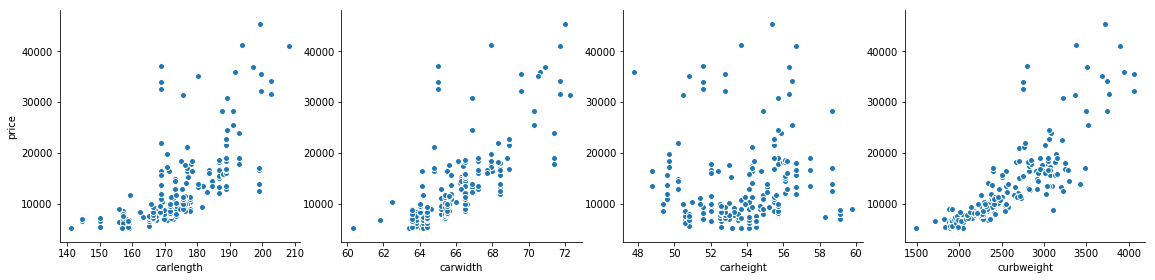

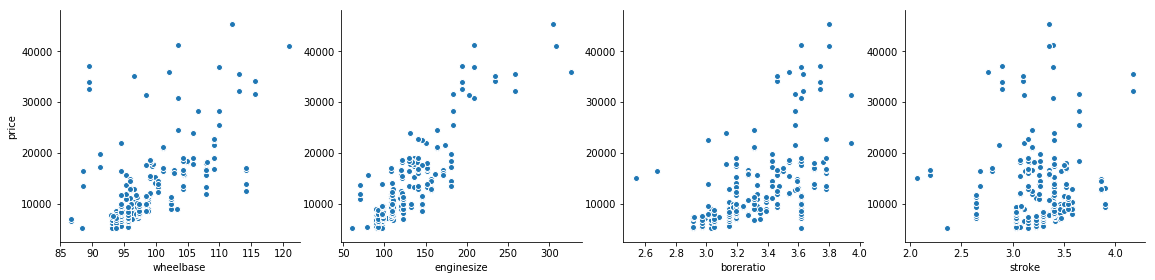

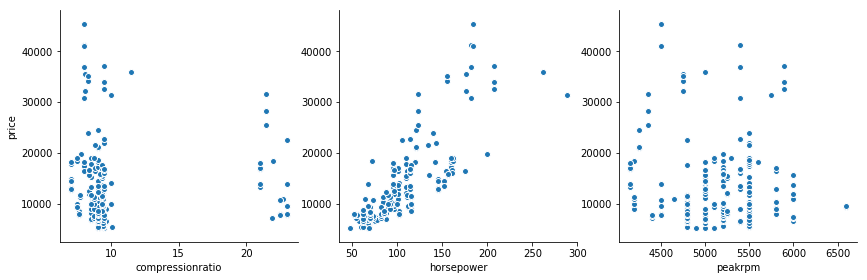

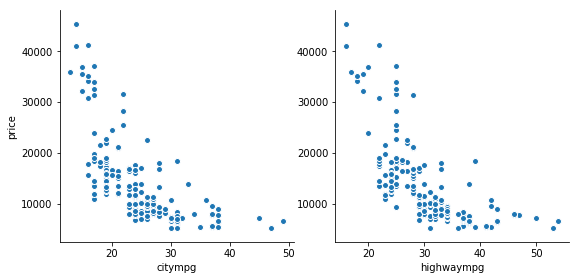

In [21]:
# Analysing the fields with respect to the car price
plt.figure(figsize=(15,20))
sns.pairplot(df_car, x_vars=['carlength' , 'carwidth', 'carheight', 'curbweight'], y_vars='price',size=4, aspect=1, kind='scatter')
sns.pairplot(df_car, x_vars=['wheelbase', 'enginesize', 'boreratio', 'stroke' ], y_vars='price',size=4, aspect=1, kind='scatter')
sns.pairplot(df_car, x_vars=['compressionratio', 'horsepower', 'peakrpm' ], y_vars='price',size=4, aspect=1, kind='scatter')
sns.pairplot(df_car, x_vars=['citympg', 'highwaympg' ], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()

Inference:
From the above scatter plot, its found that
1. carlength, carwidth, curbweight, enginesize, boreratio, horsepower, wheelbase, stroke and peakrpm - seem to have a significant positive correlation with price.
2. carheight has no co-relation found with price.
3. citympg, highwaympg - have a significant negative correlation with price.

#### <font color=navy> Derived Variable </font>

In [22]:
# City vs. Highway - A key element in assessing the EPA rating for a vehicle's average fuel economy (EPA combined) 
# is the split between highway and city driving. The EPA rating for combined mpg presumes that we drive 
# 55 percent of the time in the city and 
# 45 percent of the time on the highway

#Fuel economy
df_car['fueleconomy'] = (0.55 * df_car['citympg']) + (0.45 * df_car['highwaympg'])
df_car.tail()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyOnPriceRange,fueleconomy
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845,Medium,25.25
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045,Medium,21.70
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485,Medium,20.25
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470,Medium,26.45
204,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,19,25,22625,Medium,21.70


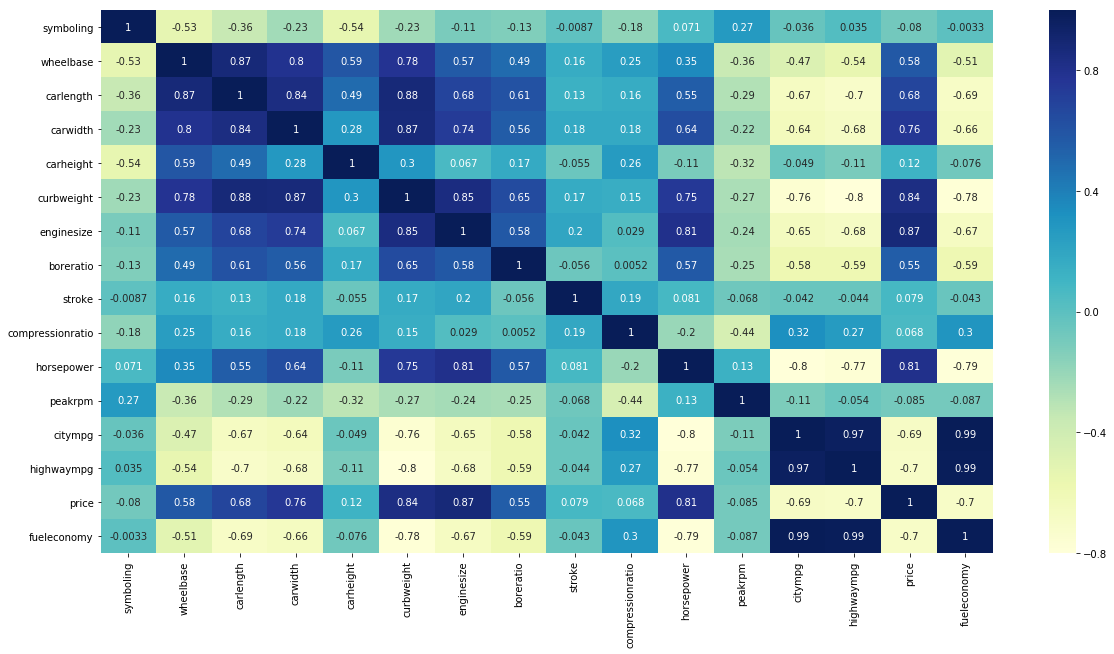

In [23]:
# Plotting Heatmap for Numerical attributes
plt.figure(figsize = (20,10))  
sns.heatmap(df_car.corr(),annot = True, cmap="YlGnBu")
plt.show()

Inference:
1. citympg and highwaympg are found to be strongly correlated with each other.
2. enginesize is strongly correlated with curbweight and horsepower.
3. wheelbase, carlength, carwidth and curbweight are strongly correlated with each other.
4. horsepower is strongly correlated with stroke and enginesize.
5. fueleconomy has an obvios negative correlation with price and is significant.

<font color = brown>
<b> Major numerical variables which is found to have significant impact with price of the car are - <br>
fueleconomy, [horsepower, stroke, enginesize, curbweight], [wheelbase, carlength, carwidth, curbweight], boreratio, compressionratio and peakrpm  </b>

#### <font color=navy> <u> Significant variables after Data Visualization : </font> </u>
1. CarCompanyOnPriceRange 
2. fueltype
3. enginetype
4. carbody
5. enginelocation   
6. cylindernumber
7. aspiration
8. drivewheel
9. fueleconomy
10. horsepower
11. stroke          
12. enginesize 
13. curbweight
14. wheelbase
15. cararea
16. boreratio
17. compressionratio  
18. peakrpm          

In [24]:
# Defining list of variables to map
df_car_model =  df_car[['CarCompanyOnPriceRange', 'fueltype', 'enginetype', 'carbody', 'enginelocation', 
                        'cylindernumber', 'aspiration', 'drivewheel', 'fueleconomy', 'horsepower', 'stroke',
                        'enginesize', 'curbweight', 'wheelbase', 'carlength', 'carwidth', 'boreratio', 'compressionratio', 
                        'peakrpm', 'price']]
numerical_varlist = df_car[['fueleconomy', 'horsepower', 'stroke', 'enginesize', 'curbweight', 'wheelbase',
                            'carlength', 'carwidth', 'boreratio', 'compressionratio', 'peakrpm']]
categorical_list = df_car[['CarCompanyOnPriceRange', 'fueltype', 'enginetype', 'carbody', 'enginelocation', 
                           'cylindernumber', 'aspiration', 'drivewheel']]

# Checking the sample of Modelling Dataframe
df_car_model.tail()

,CarCompanyOnPriceRange,fueltype,enginetype,carbody,enginelocation,cylindernumber,aspiration,drivewheel,fueleconomy,horsepower,stroke,enginesize,curbweight,wheelbase,carlength,carwidth,boreratio,compressionratio,peakrpm,price
200,Medium,gas,ohc,sedan,front,four,std,rwd,25.25,114,3.15,141,2952,109.1,188.8,68.9,3.78,9.5,5400,16845
201,Medium,gas,ohc,sedan,front,four,turbo,rwd,21.70,160,3.15,141,3049,109.1,188.8,68.8,3.78,8.7,5300,19045
202,Medium,gas,ohcv,sedan,front,six,std,rwd,20.25,134,2.87,173,3012,109.1,188.8,68.9,3.58,8.8,5500,21485
203,Medium,diesel,ohc,sedan,front,six,turbo,rwd,26.45,106,3.40,145,3217,109.1,188.8,68.9,3.01,23.0,4800,22470
204,Medium,gas,ohc,sedan,front,four,turbo,rwd,21.70,114,3.15,141,3062,109.1,188.8,68.9,3.78,9.5,5400,22625


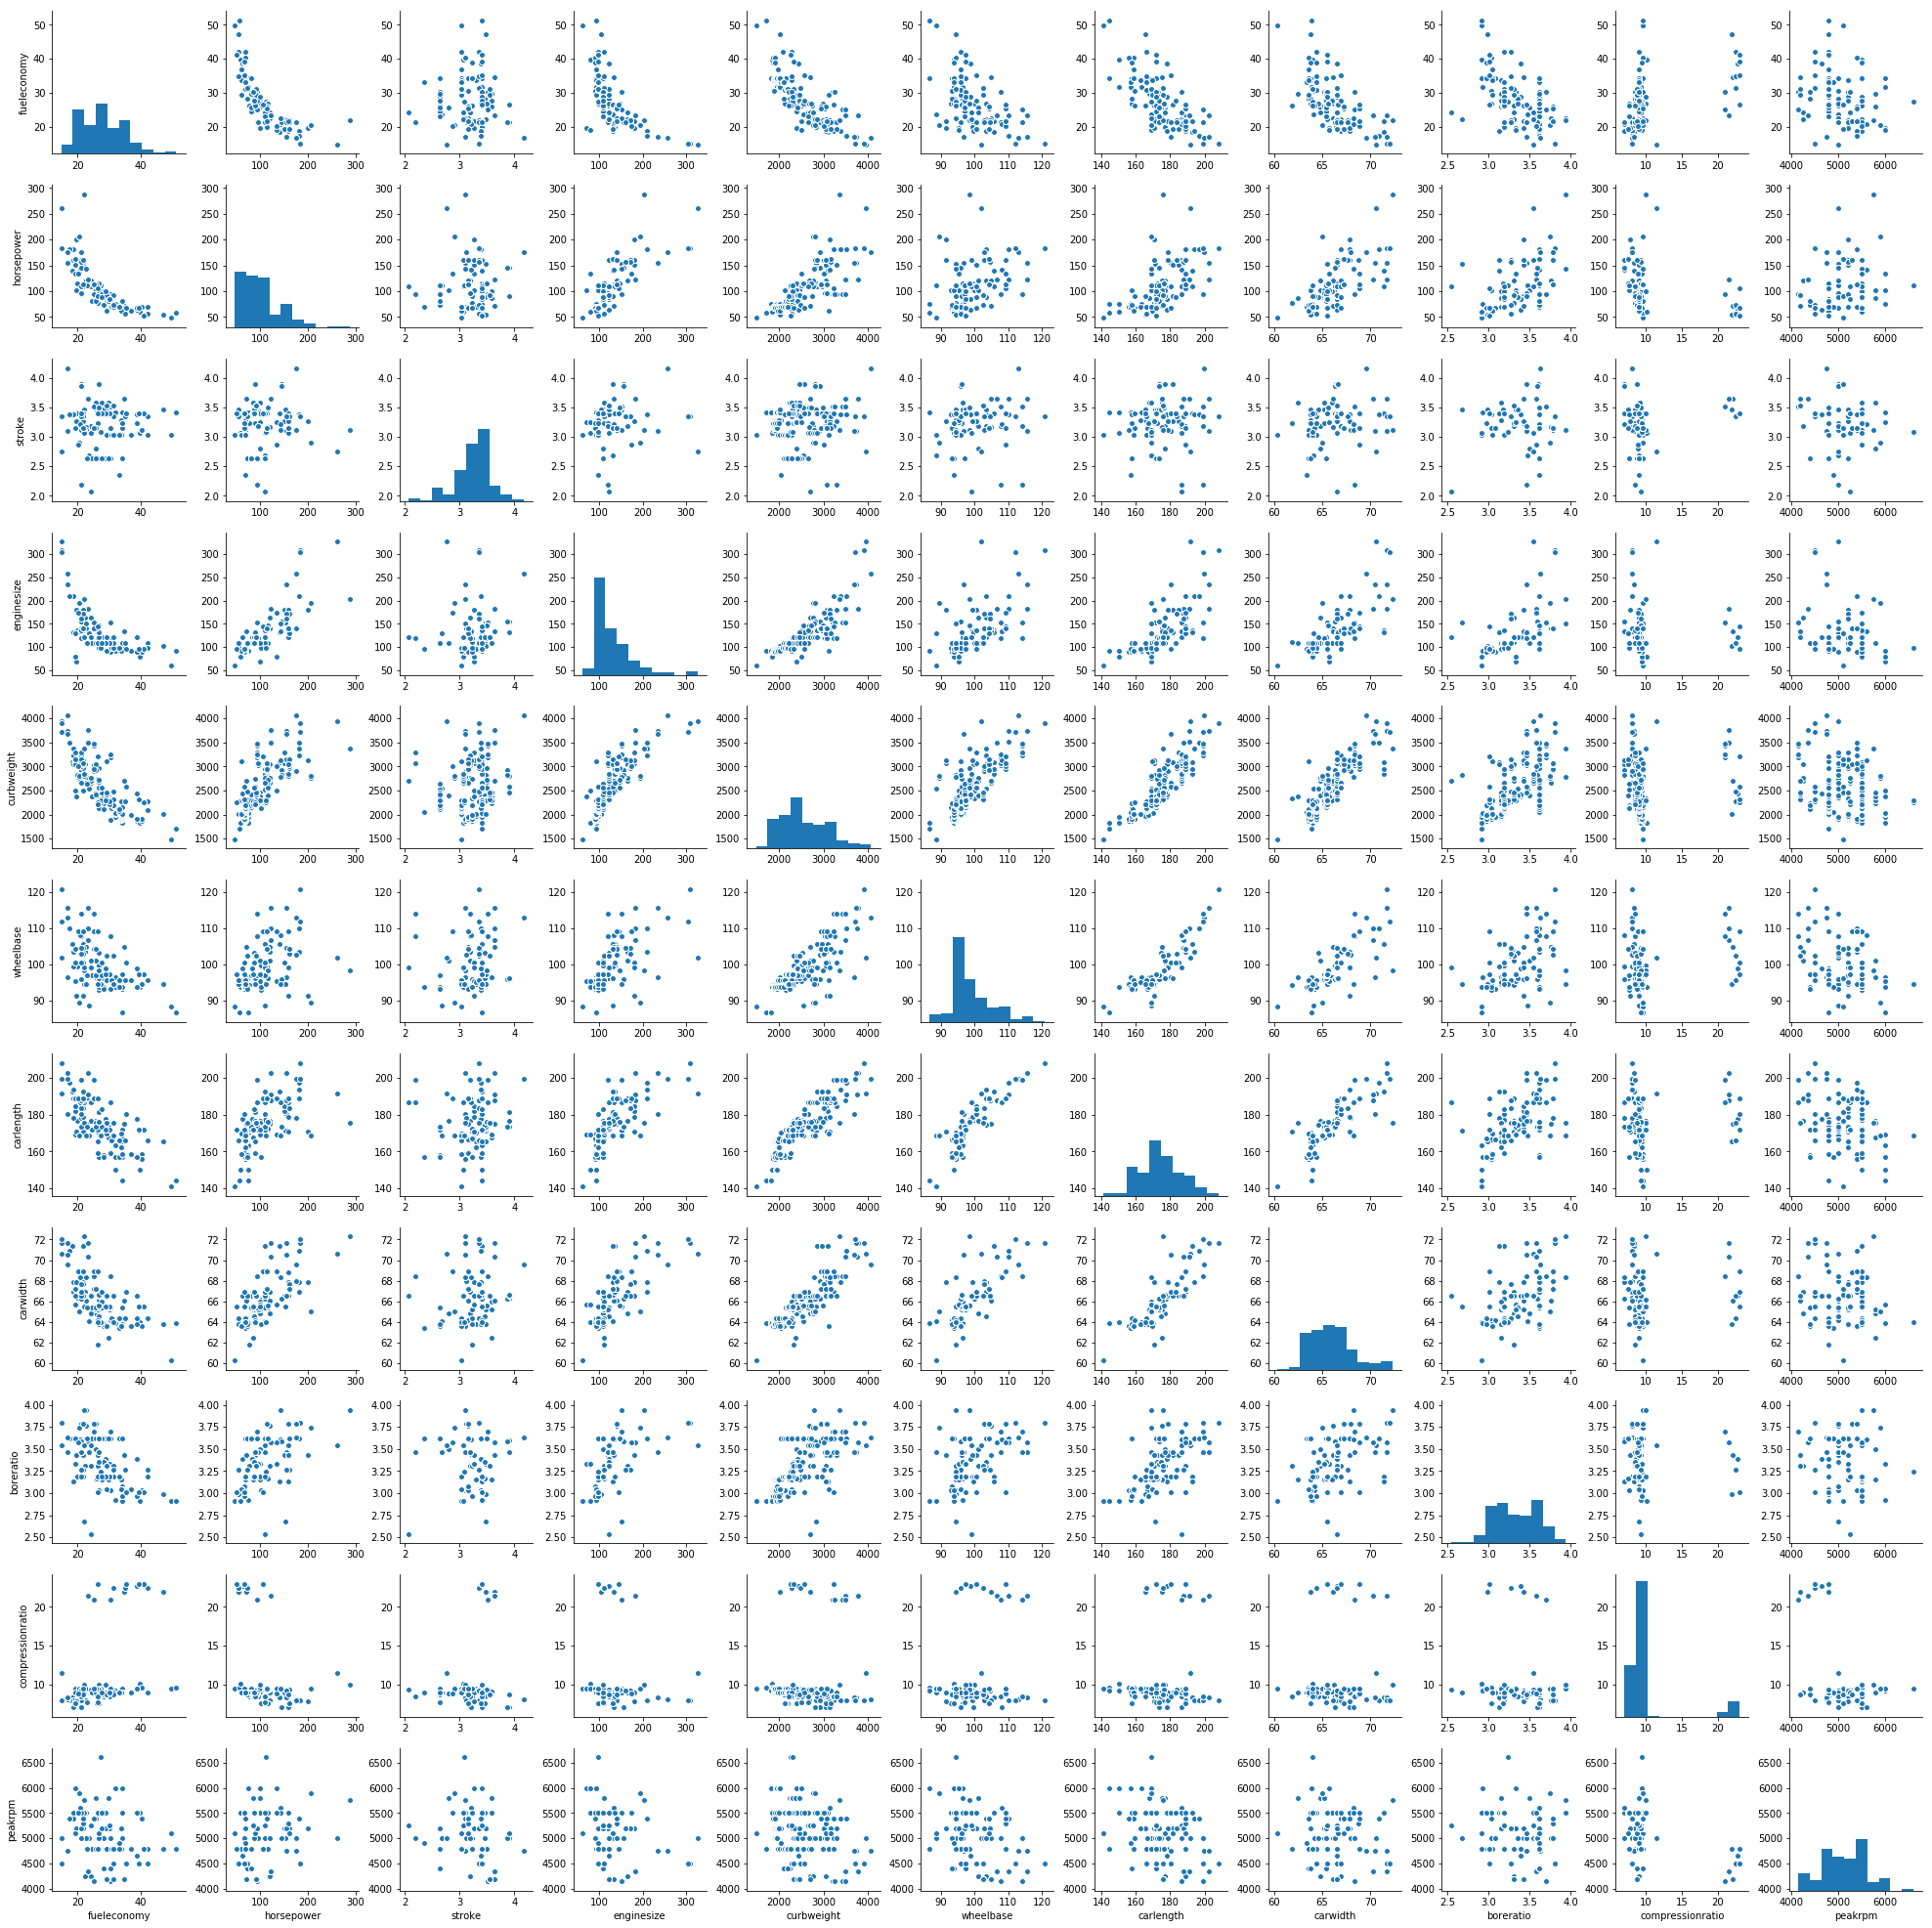

In [25]:
# Pairplot for numerical variables
plt.figure(figsize = (20,10))
sns.pairplot(numerical_varlist)
plt.show()

## Step 4: Preparing Data for Modelling <a id='Step 4'></a>

1. Encoding: 
    - Converting binary categorical variables to 1/0 and 
    - Other categorical variables (with more than two values) to  dummy variables.
2. Split in Train and Test Variables
3. Rescaling of variables

#### <font color=navy> Encoding Binary Categorical Variables </font>

In [26]:
# Defining 1/0 for binary categorical variables
# categorical_list = df_car[['CompanyName', 'fueltype', 'enginetype', 'carbody', 'enginelocation', 'cylindernumber', 
#                           'aspiration', 'drivewheel']]

#Identifying the binary categorical variables
# ['fueltype', 'enginelocation', 'aspiration']

# Applying the function to the binary categorical list
df_car_model['fueltype'] = df_car_model['fueltype'].map({"gas": 1, "diesel": 0})
df_car_model['enginelocation'] = df_car_model['enginelocation'].map({"front": 1, "rear": 0})
df_car_model['aspiration'] = df_car_model['aspiration'].map({"std": 1, "turbo": 0})

# Note: doornumber is also a binary categorical variable but its found unfit for modelling by data visualization 

In [27]:
# Check the car dataframe
df_car_model.tail()

,CarCompanyOnPriceRange,fueltype,enginetype,carbody,enginelocation,cylindernumber,aspiration,drivewheel,fueleconomy,horsepower,stroke,enginesize,curbweight,wheelbase,carlength,carwidth,boreratio,compressionratio,peakrpm,price
200,Medium,1,ohc,sedan,1,four,1,rwd,25.25,114,3.15,141,2952,109.1,188.8,68.9,3.78,9.5,5400,16845
201,Medium,1,ohc,sedan,1,four,0,rwd,21.70,160,3.15,141,3049,109.1,188.8,68.8,3.78,8.7,5300,19045
202,Medium,1,ohcv,sedan,1,six,1,rwd,20.25,134,2.87,173,3012,109.1,188.8,68.9,3.58,8.8,5500,21485
203,Medium,0,ohc,sedan,1,six,0,rwd,26.45,106,3.40,145,3217,109.1,188.8,68.9,3.01,23.0,4800,22470
204,Medium,1,ohc,sedan,1,four,0,rwd,21.70,114,3.15,141,3062,109.1,188.8,68.9,3.78,9.5,5400,22625


#### <font color=navy> Dummy Variables </font>

In [28]:
#Identifying the categorical variables which are not binary
# ['CarCompanyOnPriceRange', 'enginetype', 'carbody', 'cylindernumber', 'drivewheel']
 
# Defining the map function to fetch dummies for Categorical variables which are not Binary
def fetch_dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df_car_model = fetch_dummies('CarCompanyOnPriceRange',df_car_model)
df_car_model = fetch_dummies('enginetype',df_car_model)
df_car_model = fetch_dummies('carbody',df_car_model)
df_car_model = fetch_dummies('cylindernumber',df_car_model)
df_car_model = fetch_dummies('drivewheel',df_car_model)

In [29]:
df_car_model.shape

(205, 35)

In [30]:
df_car_model.columns

Index(['fueltype', 'enginelocation', 'aspiration', 'fueleconomy', 'horsepower',
       'stroke', 'enginesize', 'curbweight', 'wheelbase', 'carlength',
       'carwidth', 'boreratio', 'compressionratio', 'peakrpm', 'price',
       'Medium', 'High', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'five', 'four', 'six',
       'three', 'twelve', 'two', 'fwd', 'rwd'],
      dtype='object')

#### <font color=navy> Split the data in Train and Test sets </font>

In [31]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_car_model, train_size = 0.7, test_size = 0.3, random_state = 100)

#### <font color=navy> Rescaling the Features </font>
Rescaling the variables so that they have a comparable scale using Min-Max scaling 

In [32]:
scaler = MinMaxScaler()

# Apply scaler() to all the numerical columns
num_varlist = ['fueleconomy', 'horsepower', 'stroke', 'enginesize', 'curbweight', 'wheelbase', 'carlength', 
               'carwidth', 'boreratio', 'compressionratio', 'peakrpm', 'price']

df_car_model[num_varlist] = scaler.fit_transform(df_car_model[num_varlist])

In [33]:
df_car_model.head()

,fueltype,enginelocation,aspiration,fueleconomy,horsepower,stroke,enginesize,curbweight,wheelbase,carlength,...,sedan,wagon,five,four,six,three,twelve,two,fwd,rwd
0,1,1,1,0.244170,0.262500,0.290476,0.260377,0.411171,0.058309,0.413433,...,0,0,0,1,0,0,0,0,0,1
1,1,1,1,0.244170,0.262500,0.290476,0.260377,0.411171,0.058309,0.413433,...,0,0,0,1,0,0,0,0,0,1
2,1,1,1,0.201646,0.441667,0.666667,0.343396,0.517843,0.230321,0.449254,...,0,0,0,0,1,0,0,0,0,1
3,1,1,1,0.326475,0.225000,0.633333,0.181132,0.329325,0.384840,0.529851,...,1,0,0,1,0,0,0,0,1,0
4,1,1,1,0.137174,0.279167,0.633333,0.283019,0.518231,0.373178,0.529851,...,1,0,1,0,0,0,0,0,0,0


In [34]:
# Verify scaling is applied to make minimum amd maximum value of all numerical variables as 0 and 1 respectively
df_car_model.describe()

,fueltype,enginelocation,aspiration,fueleconomy,horsepower,stroke,enginesize,curbweight,wheelbase,carlength,...,sedan,wagon,five,four,six,three,twelve,two,fwd,rwd
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.902439,0.985366,0.819512,0.354150,0.233821,0.564483,0.248707,0.414106,0.354419,0.491780,...,0.468293,0.121951,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512,0.585366,0.370732
std,0.297446,0.120377,0.385535,0.182419,0.164767,0.149332,0.157142,0.201971,0.175562,0.184139,...,0.500215,0.328031,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655,0.493865,0.484183
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.196159,0.091667,0.495238,0.135849,0.254849,0.230321,0.376119,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.326475,0.195833,0.580952,0.222642,0.359193,0.303207,0.479104,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.466392,0.283333,0.638095,0.301887,0.561288,0.460641,0.626866,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df_car_model.shape

(205, 35)

#### <font color=navy> Dividing into X and Y sets for the model building

In [36]:
y_train = df_car_model.pop('price')
X_train = df_car_model

In [37]:
X_train.head()

,fueltype,enginelocation,aspiration,fueleconomy,horsepower,stroke,enginesize,curbweight,wheelbase,carlength,...,sedan,wagon,five,four,six,three,twelve,two,fwd,rwd
0,1,1,1,0.244170,0.262500,0.290476,0.260377,0.411171,0.058309,0.413433,...,0,0,0,1,0,0,0,0,0,1
1,1,1,1,0.244170,0.262500,0.290476,0.260377,0.411171,0.058309,0.413433,...,0,0,0,1,0,0,0,0,0,1
2,1,1,1,0.201646,0.441667,0.666667,0.343396,0.517843,0.230321,0.449254,...,0,0,0,0,1,0,0,0,0,1
3,1,1,1,0.326475,0.225000,0.633333,0.181132,0.329325,0.384840,0.529851,...,1,0,0,1,0,0,0,0,1,0
4,1,1,1,0.137174,0.279167,0.633333,0.283019,0.518231,0.373178,0.529851,...,1,0,1,0,0,0,0,0,0,0


In [38]:
y_train.head()

0    0.207959
1    0.282558
2    0.282558
3    0.219254
4    0.306142
Name: price, dtype: float64

## Step 5: Building a linear model <a id='Step 5'></a>

#### <font color=navy> Applying RFE - Recursive feature elimination to remaining 35 attributes

In [39]:
# Running RFE with the output number of the variable equal to 13
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 10),
 ('enginelocation', True, 1),
 ('aspiration', False, 18),
 ('fueleconomy', True, 1),
 ('horsepower', True, 1),
 ('stroke', False, 7),
 ('enginesize', False, 5),
 ('curbweight', True, 1),
 ('wheelbase', True, 1),
 ('carlength', False, 13),
 ('carwidth', True, 1),
 ('boreratio', False, 6),
 ('compressionratio', False, 11),
 ('peakrpm', False, 9),
 ('Medium', False, 15),
 ('High', True, 1),
 ('dohcv', True, 1),
 ('l', False, 17),
 ('ohc', False, 12),
 ('ohcf', False, 14),
 ('ohcv', False, 8),
 ('rotor', False, 22),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('five', False, 4),
 ('four', False, 2),
 ('six', False, 3),
 ('three', False, 16),
 ('twelve', True, 1),
 ('two', False, 20),
 ('fwd', False, 19),
 ('rwd', False, 21)]

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'fueleconomy', 'horsepower', 'curbweight',
       'wheelbase', 'carwidth', 'High', 'dohcv', 'hardtop', 'hatchback',
       'sedan', 'wagon', 'twelve'],
      dtype='object')

In [42]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'stroke', 'enginesize', 'carlength',
       'boreratio', 'compressionratio', 'peakrpm', 'Medium', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'two', 'fwd',
       'rwd'],
      dtype='object')

#### <font color=navy> Building model using statsmodel, for the detailed statistics

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,enginelocation,fueleconomy,horsepower,curbweight,wheelbase,carwidth,High,dohcv,hardtop,hatchback,sedan,wagon,twelve
0,1,0.244170,0.262500,0.411171,0.058309,0.316667,0,0,0,0,0,0,0
1,1,0.244170,0.262500,0.411171,0.058309,0.316667,0,0,0,0,0,0,0
2,1,0.201646,0.441667,0.517843,0.230321,0.433333,0,0,0,1,0,0,0
3,1,0.326475,0.225000,0.329325,0.384840,0.491667,0,0,0,0,1,0,0
4,1,0.137174,0.279167,0.518231,0.373178,0.508333,0,0,0,0,1,0,0


In [44]:
# Function to build a model using statsmodel - adding constant and fitting the model
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant variable
    lm = sm.OLS(y,X).fit() # fitting the model 
    print(lm.summary()) # print the model summary
    return X
  
# Function to check VIF for all the attributes - to identify multicollinearity     
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### <font color=navy> Model 1 </font>

In [45]:
# Building the model with first 13 attributes recieved from RFE function above
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     207.1
Date:                Sun, 01 Dec 2019   Prob (F-statistic):          5.74e-105
Time:                        12:36:12   Log-Likelihood:                 319.53
No. Observations:                 205   AIC:                            -611.1
Df Residuals:                     191   BIC:                            -564.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0969      0.053      1.

In [46]:
# Checking the VIF of all 13 attributes
checkVIF(X_train_rfe)

,Features,VIF
3,curbweight,57.17
0,enginelocation,56.26
5,carwidth,44.92
4,wheelbase,28.78
10,sedan,20.98
2,horsepower,17.16
9,hatchback,14.81
1,fueleconomy,13.26
11,wagon,5.84
8,hardtop,2.32


<font color = brown>
<b> <u> Inference of Model 1:   </u> </b>  
1. p-value of "wheelbase" attribute is high (Higher than expected significance level of 0.05). 
2. Also, VIF of "wheelbase" is found to be very high as 28.78 which shows this variable has high multicollinearity. We can infer that this attribute can be dropped. 
3. This model has R-Squared value as 0.934 which signifies that model explains 93.4 % of variance in data. 
4. Also Adj. R-squared is 0.929 which shows the overall significance of all existing attribues.

In [47]:
# Action after Inference from Model 1
X_train_new = X_train_rfe.drop(["wheelbase"], axis = 1)

#### <font color=navy> Model 2 </font>

In [48]:
# Building the model with remaining 12 attributes
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     221.3
Date:                Sun, 01 Dec 2019   Prob (F-statistic):          2.07e-105
Time:                        12:36:15   Log-Likelihood:                 317.69
No. Observations:                 205   AIC:                            -609.4
Df Residuals:                     192   BIC:                            -566.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0781      0.052      1.

In [49]:
# Checking the VIF of all remaining 12 attributes
checkVIF(X_train_new)

,Features,VIF
0,const,199.77
10,sedan,10.11
9,hatchback,9.50
4,curbweight,8.47
3,horsepower,6.61
11,wagon,4.96
5,carwidth,4.79
2,fueleconomy,4.17
8,hardtop,2.34
6,High,1.81


<font color = brown>
<b> <u> Inference of Model 2:   </u> </b>  p-value of "twelve" attribute is high (Higher than expected significance level of 0.05). We can conclude that this attribute can be dropped.

In [50]:
# Action after Inference from Model 2
X_train_new = X_train_new.drop(["twelve"], axis = 1)

#### <font color=navy> Model 3 </font>

In [51]:
# Building the model with remaining 11 attributes
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     238.7
Date:                Sun, 01 Dec 2019   Prob (F-statistic):          5.64e-106
Time:                        12:36:17   Log-Likelihood:                 316.13
No. Observations:                 205   AIC:                            -608.3
Df Residuals:                     193   BIC:                            -568.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1020      0.051      2.

In [52]:
# Checking the VIF of all 11 attributes
checkVIF(X_train_new)

,Features,VIF
0,const,185.62
10,sedan,10.11
9,hatchback,9.50
4,curbweight,8.43
3,horsepower,5.82
11,wagon,4.95
5,carwidth,4.79
2,fueleconomy,3.99
8,hardtop,2.34
6,High,1.79


<font color = brown>
<b> <u> Inference of Model 3:   </u> </b>  VIF of "sedan" is found to be very high as 10.11 which shows this variable has high multicollinearity. We can infer this attribute can be dropped.

In [53]:
# Action after Inference from Model 3
X_train_new = X_train_new.drop(["sedan"], axis = 1)

#### <font color=navy> Model 4 </font>

In [54]:
# Building the model with remaining 10 attributes
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     246.2
Date:                Sun, 01 Dec 2019   Prob (F-statistic):          1.80e-104
Time:                        12:36:19   Log-Likelihood:                 309.48
No. Observations:                 205   AIC:                            -597.0
Df Residuals:                     194   BIC:                            -560.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0625      0.051      1.

In [55]:
# Checking the VIF of all 10 attributes
checkVIF(X_train_new)

,Features,VIF
0,const,176.90
4,curbweight,8.30
3,horsepower,5.80
5,carwidth,4.63
2,fueleconomy,3.95
6,High,1.79
1,enginelocation,1.65
7,dohcv,1.49
9,hatchback,1.29
10,wagon,1.29


<font color = brown>
<b> <u> Inference of Model 4:   </u> </b>  p-value of "hardtop" attribute is high (Higher than expected significance level of 0.05). We can infer this attribute can be dropped.

In [56]:
# Action after Inference from Model 4
X_train_new = X_train_new.drop(["hardtop"], axis = 1)

#### <font color=navy> Model 5 </font>

In [57]:
# Building the model with remaining 9 attributes
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     274.4
Date:                Sun, 01 Dec 2019   Prob (F-statistic):          1.24e-105
Time:                        12:36:21   Log-Likelihood:                 309.30
No. Observations:                 205   AIC:                            -598.6
Df Residuals:                     195   BIC:                            -565.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0554      0.049      1.

In [58]:
# Checking the VIF of all 9 attributes
checkVIF(X_train_new)

,Features,VIF
0,const,166.69
4,curbweight,8.29
3,horsepower,5.79
5,carwidth,4.62
2,fueleconomy,3.95
6,High,1.78
1,enginelocation,1.51
7,dohcv,1.48
9,wagon,1.28
8,hatchback,1.27


<font color = brown>
<b> <u> Inference of Model 5:   </u> </b>  VIF of "curbweight" is found to be very high as 8.29 which shows this variable has high multicollinearity. We can infer this attribute can be dropped.

In [59]:
# Action after Inference from Model 5
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

#### <font color=navy> Model 6 </font>

In [60]:
# Building the model with remaining 8 attributes
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     276.7
Date:                Sun, 01 Dec 2019   Prob (F-statistic):          2.08e-102
Time:                        12:36:24   Log-Likelihood:                 298.48
No. Observations:                 205   AIC:                            -579.0
Df Residuals:                     196   BIC:                            -549.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0471      0.052      0.

In [61]:
# Checking the VIF of all 8 attributes
checkVIF(X_train_new)

,Features,VIF
0,const,166.47
3,horsepower,4.97
2,fueleconomy,3.79
4,carwidth,2.38
5,High,1.68
1,enginelocation,1.45
6,dohcv,1.36
7,hatchback,1.22
8,wagon,1.16


<font color = brown>
<b> <u> Inference of Model 6:   </u> </b>  p-value of "fueleconomy" attribute is high (Higher than expected significance level of 0.05). We can infer this attribute can be dropped.

In [62]:
# Action after Inference from Model 6
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

#### <font color=navy> Model 7 </font>

In [63]:
# Building the model with remaining 7 attributes
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     317.8
Date:                Sun, 01 Dec 2019   Prob (F-statistic):          1.15e-103
Time:                        12:36:27   Log-Likelihood:                 298.45
No. Observations:                 205   AIC:                            -580.9
Df Residuals:                     197   BIC:                            -554.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0402      0.039      1.

In [64]:
# Checking the VIF of all 7 attributes
checkVIF(X_train_new)

,Features,VIF
0,const,93.52
2,horsepower,2.56
3,carwidth,2.21
4,High,1.67
1,enginelocation,1.42
6,hatchback,1.22
5,dohcv,1.16
7,wagon,1.11


<font color = brown>
<b> <u> Inference of Model 7:   </u> </b>  p-value of "wagon" attribute is high (Higher than expected significance level of 0.05). We can infer this attribute can be dropped.

In [65]:
# Action after Inference from Model 7
X_train_new = X_train_new.drop(["wagon"], axis = 1)

#### <font color=navy> Model 8 </font>

In [66]:
# Building the model with remaining 6 attributes
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     370.5
Date:                Sun, 01 Dec 2019   Prob (F-statistic):          9.63e-105
Time:                        12:36:30   Log-Likelihood:                 297.91
No. Observations:                 205   AIC:                            -581.8
Df Residuals:                     198   BIC:                            -558.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0377      0.039      0.

In [67]:
# Checking the VIF of all 6 attributes
checkVIF(X_train_new)

,Features,VIF
0,const,93.16
2,horsepower,2.55
3,carwidth,2.20
4,High,1.64
1,enginelocation,1.42
5,dohcv,1.16
6,hatchback,1.14


<font color = brown>
<b> <u> Inference of Model 8:   </u> </b>  p-value of all the existing six attributes are below significance level of 0.05. Also, VIF for the attributes are below 5 and shows lack of multicollinearity. R-squared value is 0.918 showing 91.8% variation of data. Adj. R-squared is also 0.916 which is commendable.
Still, we can try dropping "hatchback" having highest p-value of existing attributes list and checking the model further.

In [68]:
# Action after Inference from Model 8
X_train_new1 = X_train_new.drop(["hatchback"], axis = 1)
X_train_new.head()

,const,enginelocation,horsepower,carwidth,High,dohcv,hatchback
0,1.0,1,0.262500,0.316667,0,0,0
1,1.0,1,0.262500,0.316667,0,0,0
2,1.0,1,0.441667,0.433333,0,0,1
3,1.0,1,0.225000,0.491667,0,0,0
4,1.0,1,0.279167,0.508333,0,0,0


#### <font color=navy> Model 9 </font>

In [69]:
# Building the model with remaining 5 attributes
X_train_new1 = build_model(X_train_new1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     427.3
Date:                Sun, 01 Dec 2019   Prob (F-statistic):          2.54e-104
Time:                        12:36:32   Log-Likelihood:                 293.71
No. Observations:                 205   AIC:                            -575.4
Df Residuals:                     199   BIC:                            -555.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0352      0.040      0.

In [70]:
# Checking the VIF of all 5 attributes
checkVIF(X_train_new1)

,Features,VIF
0,const,93.12
2,horsepower,2.47
3,carwidth,2.06
4,High,1.61
1,enginelocation,1.40
5,dohcv,1.14


<font color = brown>
<b> <u> Inference of Model 9:   </u> </b>  There is no significant change in the R-squared or Adjusted R-squared values. In fact, both these values has decreased as compared to the previous model, so we will retain Model 8

## Step 6: Residual Analysis of the train data <a id='Step 6'></a>

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [71]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

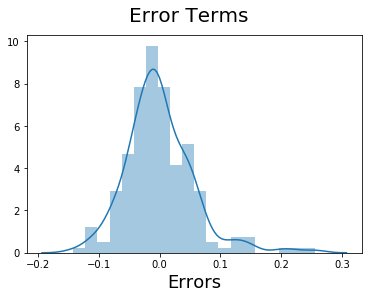

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

<font color = brown>
<b> From the above graph, its clear that Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

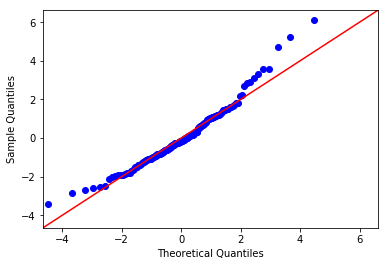

In [73]:
import scipy.stats as stats
fig = sm.qqplot(y_train - y_train_price, stats.t, distargs=(4,), fit=True, line='45')
plt.show()

<font color = brown>
<b> Above Q-Q Plot shows the Normal distribution of the Residuals/Errors - quantiles from the standard Normal distribution with mean 0 and standard deviation 1 

## Step 7: Making Predictions Using the Final Model <a id='Step 7'></a>

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. Model 8.

#### <font color=navy> Rescaling the Features of test data </font>
Rescaling the variables so that they have a comparable scale using Min-Max scaling 

In [74]:
# Apply scaler() to all the numerical columns
num_varlist = ['fueleconomy', 'horsepower', 'stroke', 'enginesize', 'curbweight', 'wheelbase', 'carlength', 
               'carwidth', 'boreratio', 'compressionratio', 'peakrpm', 'price']

df_test[num_varlist] = scaler.transform(df_test[num_varlist])

In [75]:
df_test.describe()

,fueltype,enginelocation,aspiration,fueleconomy,horsepower,stroke,enginesize,curbweight,wheelbase,carlength,...,sedan,wagon,five,four,six,three,twelve,two,fwd,rwd
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.000000,62.000000
mean,0.887097,0.967742,0.822581,0.344661,0.248858,0.570353,0.265673,0.428470,0.370121,0.513553,...,0.451613,0.096774,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.564516,0.419355
std,0.319058,0.178127,0.385142,0.175037,0.163376,0.151553,0.162820,0.179488,0.179970,0.174354,...,0.501716,0.298064,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.499868,0.497482
min,0.000000,0.000000,0.000000,0.002743,0.016667,0.000000,0.067925,0.128394,0.000000,0.052239,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.192387,0.107292,0.514286,0.177358,0.305275,0.265306,0.421642,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.326475,0.218750,0.609524,0.226415,0.406129,0.327988,0.502985,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.451303,0.295833,0.661905,0.316038,0.564876,0.482507,0.660821,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.747599,0.662500,0.871429,0.932075,0.935609,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000


#### <font color=navy> Dividing into X_test and y_test

In [76]:
y_test = df_test.pop('price')
X_test = df_test

#### <font color=navy> Using Model 8 to make predictions on Test data

In [77]:
# Dropping the constant (intercept) from X_train_new
X_train_new = X_train_new.drop('const',axis=1)

# Fetching required columns from test set
X_test_new = X_test[X_train_new.columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [78]:
# Making predictions using the eighth model
y_pred = lm.predict(X_test_new)

## Step 8: Model Evaluation <a id='Step 8'></a>
Let's now plot the graph for actual versus predicted values.

In [79]:
# Print summary of predication done on Test data
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     370.5
Date:                Sun, 01 Dec 2019   Prob (F-statistic):          9.63e-105
Time:                        12:36:48   Log-Likelihood:                 297.91
No. Observations:                 205   AIC:                            -581.8
Df Residuals:                     198   BIC:                            -558.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0377      0.039      0.

<font color = brown>
<b> <u> Inference: </b> </u> <br>
1. p-Value of all the six attributes is less than 0.05 (significance level) and hence all attributes are significant.
2. R-squared value of the model is 0.918 which signifies that model explains 91.8% of data variation.
3. Adj. R-squared value is 0.916 which shows that model is stable.
4. F-stats and Prob(F-stats) (overall model fit) - 370.5 and 9.63e-105(close to 0) - These parameters signifies that model fit is significant and explained 91.8% variance is just not by chance.

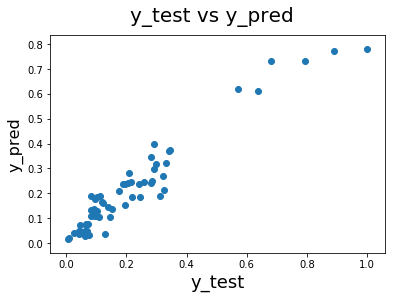

In [80]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

In [81]:
# calculate the R-squared score on the test set
# where y_test is the test data set for the target variable, and 
# y_pred is the variable containing the predicted values of the target variable on the test set
r2_score(y_test, y_pred)

0.92566127423618105

<font color = brown>
<b> <u> Inference:   </u> </b>  The R-squared score of test data is 0.92566127423618105 which is similar and very close to the value we obtained from Model 8


We can see that the equation of our best fitted line is:
<font color = Orange>
<b>
$ price = -0.1401  \times enginelocation + 0.4165  \times  horsepower + 0.3965 \times carwidth + 0.2612 \times High - 0.2933 \times dohcv - 0.0260 \times hatchback $


<u> In the above equation </u>
- enginelocation - Categorical attribute depicting Location of car engine - front or rear
- horsepower - Numerical attribute depicting horsepower of the car
- carwidth - Numerical attribute depicting width of the car
- High - CarCompany were grouped in High/Medium/Low ranges according to the price of the car. High depicts car companies having price in range 20000 to 40000. Car company in this range are "audi", "bmw", "jaguar", "buick", "porsche" and "volvo"
- dohcv - One of the categorical value of enginetype of the car
- hatchback - One of the categorical value of the carbody

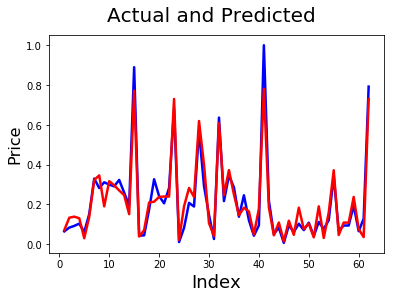

In [84]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-label
plt.show()

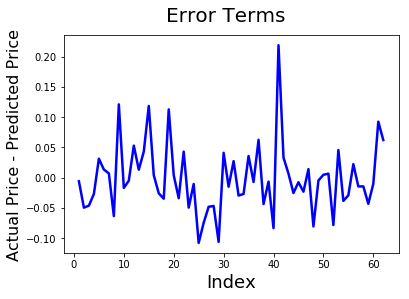

In [87]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Actual Price - Predicted Price', fontsize=16)                # Y-label
plt.show()